In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('C:\\Users\\Admin\\Desktop\\data analyst\\datasets\\Online_Retail.xlsx')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [3]:
df.shape

(541909, 8)

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

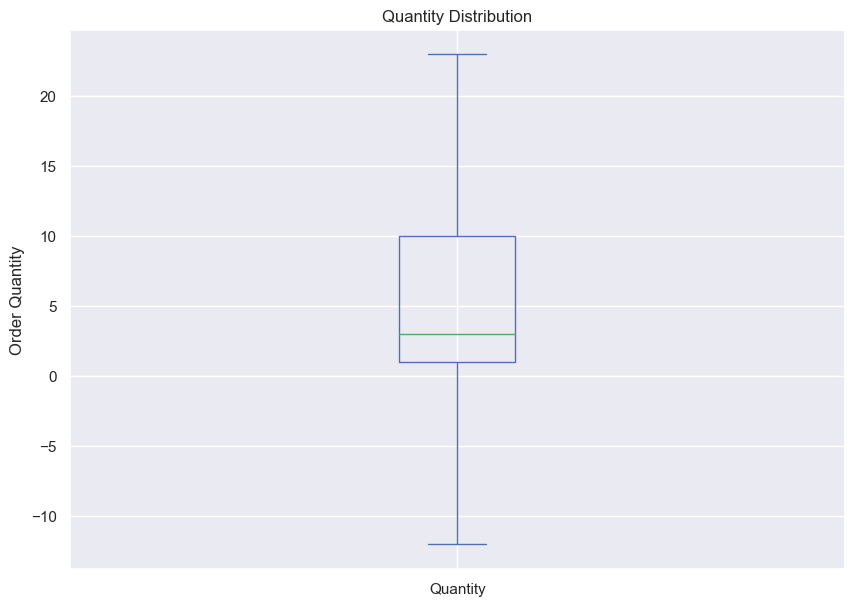

In [5]:
ax = df['Quantity'].plot.box(
showfliers=False,
grid=True,
figsize=(10, 7)
)
ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')
plt.suptitle("")
plt.show()

In [6]:
df = df.loc[df['Quantity'] > 0]

In [7]:
### time series trends

In [8]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [9]:
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

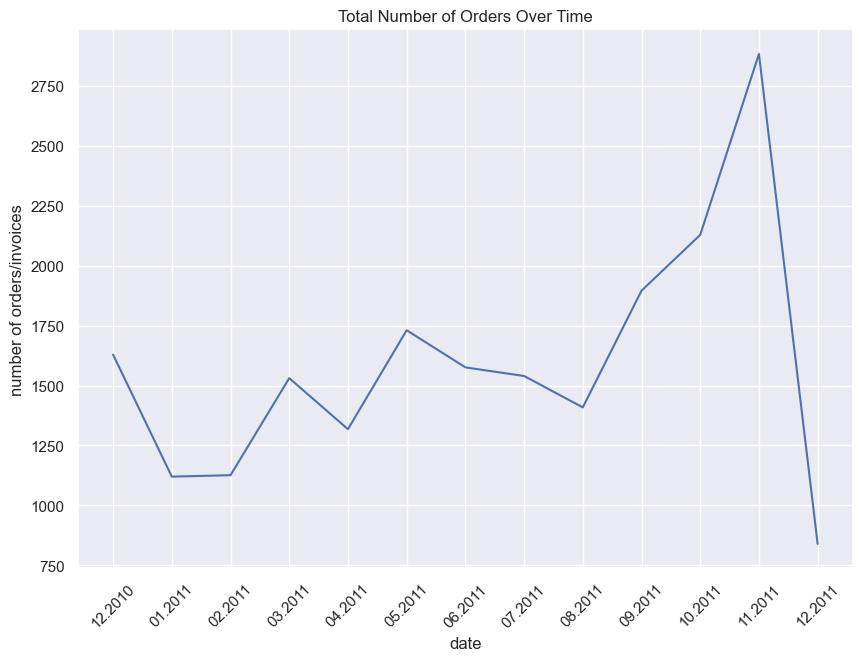

In [10]:
ax=pd.DataFrame(monthly_orders_df.values).plot(
grid=True,
figsize=(10,7),
legend=False
)
ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')
plt.xticks(
range(len(monthly_orders_df.index)),
[x.strftime('%m.%Y') for x in monthly_orders_df.index],
rotation=45
)
plt.show()

In [11]:
invoice_dates = df.loc[
df['InvoiceDate'] >= '2011-12-01',
'InvoiceDate'
]
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [12]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_18632\612871742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


In [13]:
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
2011-12-31     638792.680
Freq: M, Name: Sales, dtype: float64

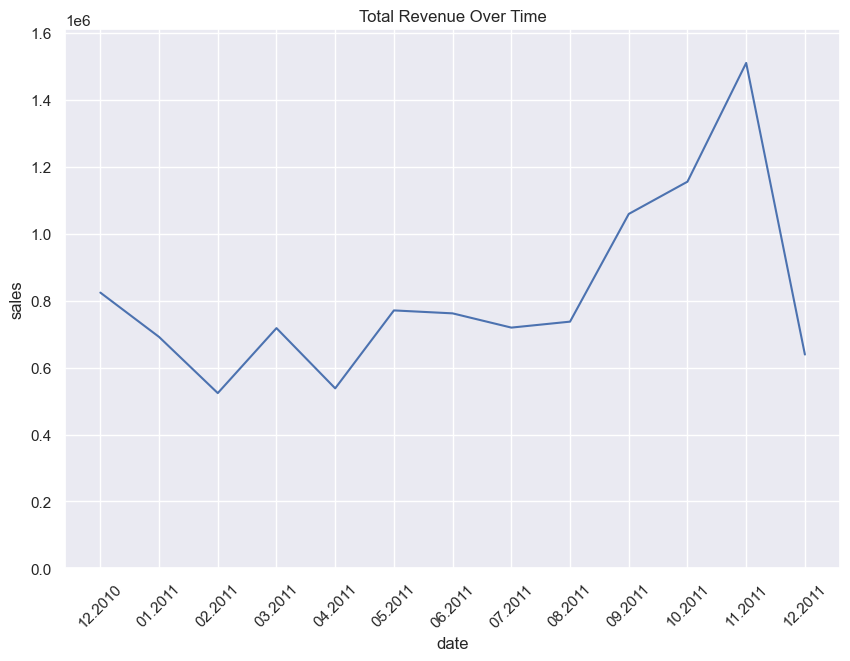

In [14]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
grid=True,
figsize=(10,7),
legend=False
)
ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
plt.xticks(
range(len(monthly_revenue_df.index)),
[x.strftime('%m.%Y') for x in monthly_revenue_df.index],
rotation=45
)
plt.show()

In [15]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Sales  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34

In [16]:
invoice_customer_df = df.groupby(
by=['InvoiceNo', 'InvoiceDate']
).agg({
'Sales': sum,
'CustomerID': max,
'Country': max,
}).reset_index()

In [17]:
invoice_customer_df

InvoiceNo         InvoiceDate     Sales  CustomerID         Country
0        536365 2010-12-01 08:26:00    139.12     17850.0  United Kingdom
1        536366 2010-12-01 08:28:00     22.20     17850.0  United Kingdom
2        536367 2010-12-01 08:34:00    278.73     13047.0  United Kingdom
3        536368 2010-12-01 08:34:00     70.05     13047.0  United Kingdom
4        536369 2010-12-01 08:35:00     17.85     13047.0  United Kingdom
...         ...                 ...       ...         ...             ...
20765    581586 2011-12-09 12:49:00    339.20     13113.0  United Kingdom
20766    581587 2011-12-09 12:50:00    249.45     12680.0          France
20767   A563185 2011-08-12 14:50:00  11062.06         NaN  United Kingdom
20768   A563186 2011-08-12 14:51:00 -11062.06         NaN  United Kingdom
20769   A563187 2011-08-12 14:52:00 -11062.06         NaN  United Kingdom

[20770 rows x 5 columns]

In [18]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

In [19]:
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
2011-12-31    106
Freq: M, Name: CustomerID, dtype: int64

In [20]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [21]:
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
2011-12-31     615
Freq: M, Name: CustomerID, dtype: int64

In [22]:
monthly_repeat_percentage =monthly_repeat_customers_df/monthly_unique_customers_df*100.0

In [23]:
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
2011-12-31    17.235772
Freq: M, Name: CustomerID, dtype: float64

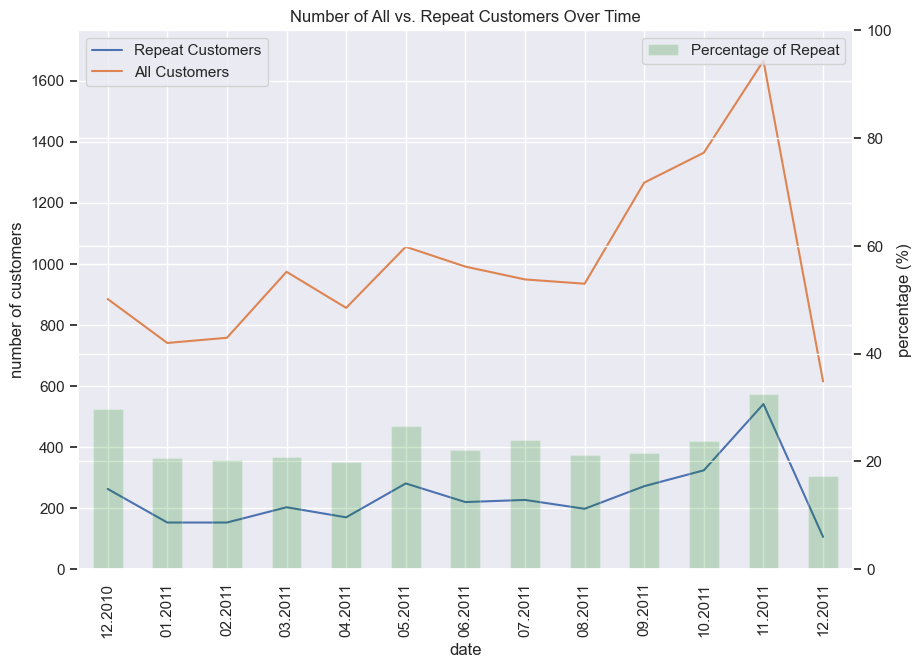

In [24]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)
pd.DataFrame(monthly_unique_customers_df.values).plot(
ax=ax,
grid=True
)
ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
ax=ax,
grid=True,
secondary_y=True,
color='green',
alpha=0.2
)
ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')
ax2.set_ylabel('percentage (%)')
ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')
ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])
plt.xticks(
range(len(monthly_repeat_customers_df.index)),
[x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],
rotation=45
)
plt.show()

In [25]:
monthly_rev_repeat_customers_df =invoice_customer_df.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']
monthly_rev_perc_repeat_customers_df =monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0

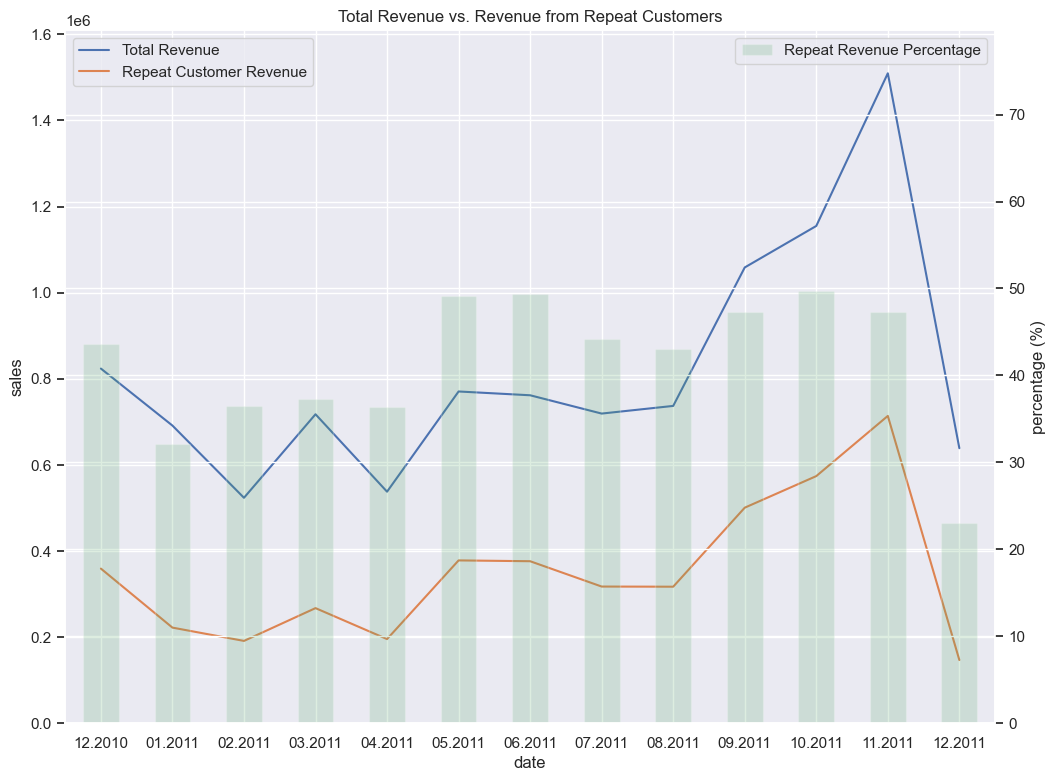

In [26]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))
pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
ax=ax,
grid=True,
)
ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')
ax.legend(['Total Revenue', 'Repeat Customer Revenue'])
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
ax2 = ax.twinx()
pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
ax=ax2,
kind='bar',
color='g',
alpha=0.2
)
ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])
ax2.set_xticklabels([
x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])
plt.show()

In [27]:
date_item_df = df.set_index('InvoiceDate').groupby([
pd.Grouper(freq='M'), 'StockCode'
])['Quantity'].sum()

In [28]:
date_item_df

InvoiceDate  StockCode   
2010-12-31   10002           251
             10120            16
             10125           154
             10133           130
             10135           411
                            ... 
2011-12-31   DCGSSBOY          1
             DOT              17
             M               819
             POST            124
             gift_0001_10      1
Name: Quantity, Length: 34177, dtype: int64

In [29]:
last_month_sorted_df = date_item_df.loc[['2011-11-30']].sort_values( ascending=False
).reset_index()

In [30]:
last_month_sorted_df

InvoiceDate StockCode  Quantity
0     2011-11-30     23084     14954
1     2011-11-30     84826     12551
2     2011-11-30     22197     12460
3     2011-11-30     22086      7908
4     2011-11-30    85099B      5909
...          ...       ...       ...
2941  2011-11-30     84549         1
2942  2011-11-30     84527         1
2943  2011-11-30    90082B         1
2944  2011-11-30    90082D         1
2945  2011-11-30    90026D         1

[2946 rows x 3 columns]

In [31]:
date_item_df = df.loc[
    df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'
])['Quantity'].sum()

In [32]:
date_item_df=pd.DataFrame(date_item_df)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909
2011-12-31  22086          2089
            22197          6217
            23084          4311
            84826            92
            85099B         1105

In [33]:
trending_itmes_df =date_item_df.reset_index().pivot(index='InvoiceDate',columns='StockCode').fillna(0)
trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)

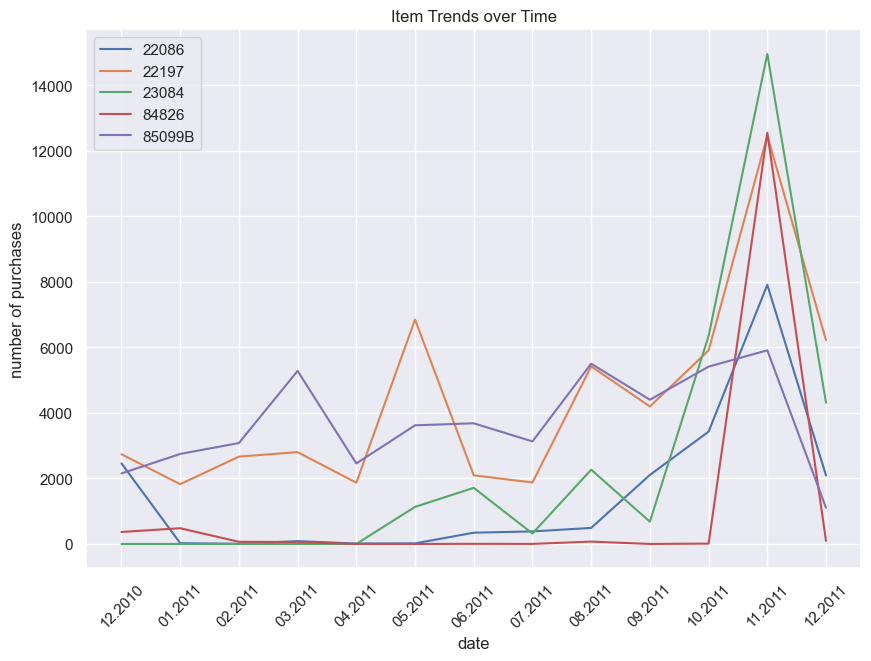

In [34]:
ax = pd.DataFrame(trending_itmes_df.values).plot(
figsize=(10,7),
grid=True,
)
ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')
ax.legend(trending_itmes_df.columns, loc='upper left')
plt.xticks(
range(len(trending_itmes_df.index)),
[x.strftime('%m.%Y') for x in trending_itmes_df.index],
rotation=45
)
plt.show()